In [1]:
# make the screen bigger!
from IPython.display import display, HTML
display(HTML(data=""" <style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; } </style> """))


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib notebook

# set options 
pd.set_option('display.max_rows', 3500)  

In [4]:
# from https://github.com/jsta/cond2sal_shiny/blob/master/helpers.R

def cond2sal(c, t = 25, P = 0):          # c in (uS/cm)
    a0 = 0.008
    a1 = -0.1692
    a2 = 25.3851
    a3 = 14.0941
    a4 = -7.0261
    a5 = 2.7081
    b0 = 5e-04
    b1 = -0.0056
    b2 = -0.0066
    b3 = -0.0375
    b4 = 0.0636
    b5 = -0.0144
    c0 = 0.6766097
    c1 = 0.0200564
    c2 = 0.0001104
    c3 = -6.9698e-07
    c4 = 1.0031e-09
    D1 = 0.03426
    D2 = 0.0004464
    D3 = 0.4215
    D4 = -0.003107
    e1 = 0.000207
    e2 = -6.37e-08
    e3 = 3.989e-12
    Csw = 42.914
    K = 0.0162
    
    Ct = round(c * (1 + 0.0191 * (t - 25)), 0)
    R = (Ct/1000)/Csw
    rt = c0 + (t * c1) + (t**2 * c2) + (t**3 * c3) + (t**4 * c4)
    Rp = 1 + (P * e1 + e2 * P**2 + e3 * P**3)/(1 + D1 * t + D2 * t**2 + (D3 + D4 * t) * R)
    Rt1 = R/(Rp * rt)
    dS = (b0 + b1 * Rt1**(1/2) + b2 * Rt1**(2/2) + b3 * Rt1**(3/2) + b4 * Rt1**(4/2) + b5 * Rt1**(5/2)) * (t - 15)/(1 + K * (t - 15))
    S = a0 + a1 * Rt1**(1/2) + a2 * Rt1**(2/2) + a3 * Rt1**(3/2) + a4 * Rt1**(4/2) + a5 * Rt1**(5/2) + dS
    
    return(S)

def ohmM_to_uSpcm(ohmMs):
    
    uSpcm = ohmMs*10000
    
    return uSpcm

In [8]:
data = pd.read_csv("Line3a_Segment1.txt", sep = " ", index_col=False)

data['Salinity'] = data['Resistivity'].apply(lambda x: cond2sal(ohmM_to_uSpcm(x)))

<IPython.core.display.Javascript object>


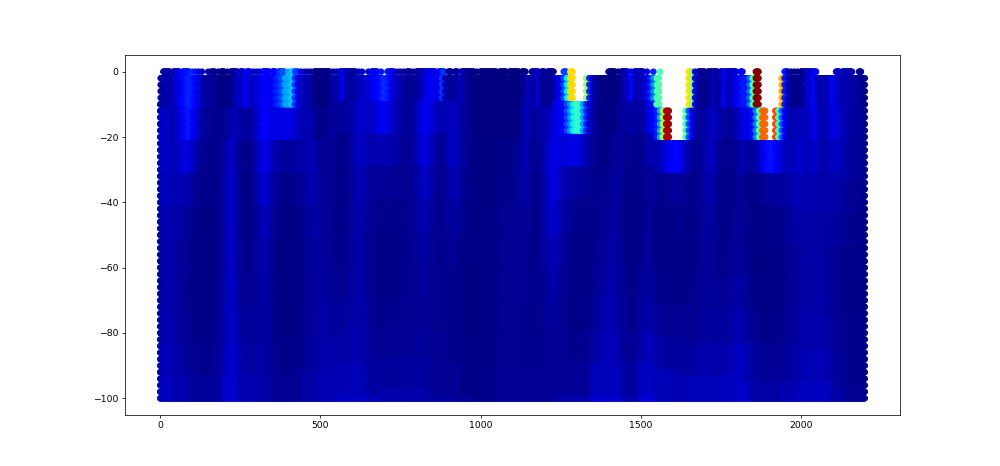

In [9]:
StartX = data['E'][0]
StartY = data['N'][0]
data["Xdistance"] = np.sqrt((data["E"]-StartX)**2 + (data["N"]-StartY)**2)

data['D'] =  data['D']*-1

# cut out no data values
data2 = data[data['D'] < 1000]
data3 = data[data['Resistivity'] < 6]

fig, ax = plt.subplots(figsize =(15,7))
plt.scatter(data3['Xdistance'], data3['D'], c=data3['Salinity'], cmap=plt.cm.jet)

In [18]:
72.657161

72.657161

In [10]:
sorteddata = data.sort_values(by='Resistivity', ascending=False)
sorteddata.head(1000)

,E,N,D,Resistivity,Salinity,Xdistance
53295,816601,2198801,0,1.000000e+13,1.259853e+31,2089.253455
36567,817055,2199274,0,1.000000e+13,1.259853e+31,1433.627915
29376,817250,2199478,0,1.000000e+13,1.259853e+31,1151.420861
16269,817606,2199849,0,1.000000e+13,1.259853e+31,637.244851
55947,816529,2198726,0,1.000000e+13,1.259853e+31,2193.219779
54162,816577,2198776,0,1.000000e+13,1.259853e+31,2123.908896
35139,817093,2199315,0,1.000000e+13,1.259853e+31,1377.734372
54213,816576,2198775,0,1.000000e+13,1.259853e+31,2125.322799
4029,817938,2200195,0,1.000000e+13,1.259853e+31,157.724443
17901,817561,2199803,0,1.000000e+13,1.259853e+31,701.592474


#### unit conversions notes
1 ohm-m = 1 S/m  
1 S/m = 10000 uS/cm

https://www.cactus2000.de/uk/unit/masscnd.php
https://www.translatorscafe.com/unit-converter/en-US/electric-conductivity/12-10/microsiemens/meter-millisiemens/meter/

http://salinometry.com/pss-78/

In [7]:
data

,Unnamed: 0,Unnamed: 1,E,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,N,Unnamed: 10,Unnamed: 11,D(m),Resistivity,(ohm-m),Salinity,Xdistance
0,818047,2200309,0,NaN,0.31985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,818047,2200309,2,NaN,0.28886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,818047,2200309,4,NaN,0.28886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,818047,2200309,6,NaN,0.28886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,818047,2200309,8,NaN,0.28886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56146,816525,2198721,92,0.21596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56147,816525,2198721,94,0.21596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56148,816525,2198721,96,0.21596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56149,816525,2198721,98,0.23744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
